In [31]:
import numpy as np
import pandas as pd

In [5]:
population=np.random.randint(1,80,1000)
population[0:10]

array([29, 42, 41, 73, 33, 41, 54,  5, 51,  4])

In [6]:
np.random.seed(115)
test=np.random.choice(a=population,size=100)
test[0:10]

array([79, 69, 78, 15, 12,  7, 21, 18,  8, 55])

In [7]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
import researchpy as rp

In [9]:
rp.summary_cont(df[["total_bill","tip","size"]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'total_bill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tip' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'size' has dtype incompatible with float64, plea

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [10]:
rp.summary_cat(df[["sex","smoker","time"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,time,Dinner,176,72.13
5,,Lunch,68,27.87


In [11]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [12]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


#cost strategy decision making

In [13]:
price=np.random.randint(1,110,1000)
price.mean()

np.float64(55.02)

In [14]:
import statsmodels.stats.api as sns

In [15]:
sns.DescrStatsW(price).tconfint_mean()

(np.float64(53.052530935673076), np.float64(56.98746906432693))

In [16]:
from scipy.stats import bernoulli

In [17]:
p=0.6

In [18]:
rv=bernoulli(p)
rv.pmf(k=0)

np.float64(0.4000000000000001)

In [19]:
from scipy.stats import binom

In [20]:
# company reasearch 0.01 for 100  person
p=0.01
n=100
rv=binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


In [21]:
#detceted time and area uniqe stuation
#website mistakken  data 

from scipy.stats import poisson

rv=poisson(mu=0.1)
print(rv.pmf(k=3))
print(rv.pmf(k=5))

0.00015080623633932676
7.54031181696634e-08


In [22]:
#Normal dagilim
from scipy.stats import norm


In [23]:
1-norm.cdf(90,80,5)#bigger then 90

np.float64(0.02275013194817921)

In [24]:
1-norm.cdf(70,80,5)# bigger then 70

np.float64(0.9772498680518208)

In [25]:
norm.cdf(73,80,5)# less then 70

np.float64(0.08075665923377107)

In [26]:
norm.cdf(90,80,5) -norm.cdf(85,80,5)# betwen 85-90

np.float64(0.13590512198327787)

In [28]:
# hipothesis step by step
import scipy.stats as stats
num=np.random.randint(0,200,50)



In [30]:
stats.describe(num)

DescribeResult(nobs=50, minmax=(np.int64(0), np.int64(199)), mean=np.float64(104.92), variance=np.float64(3638.646530612245), skewness=np.float64(0.030708442000612735), kurtosis=np.float64(-1.2341340678766306))

Normal posiblty

<Axes: ylabel='Frequency'>

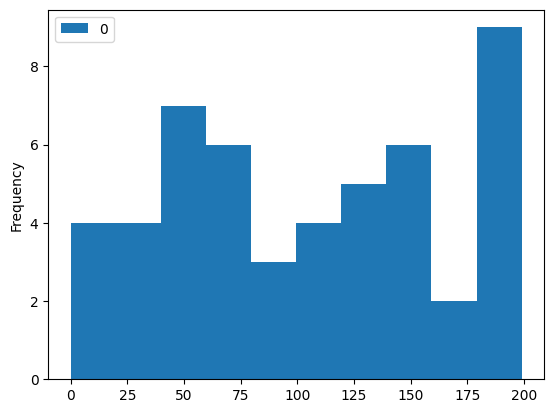

In [ ]:
#Histogram plot
pd.DataFrame(num).plot.hist()

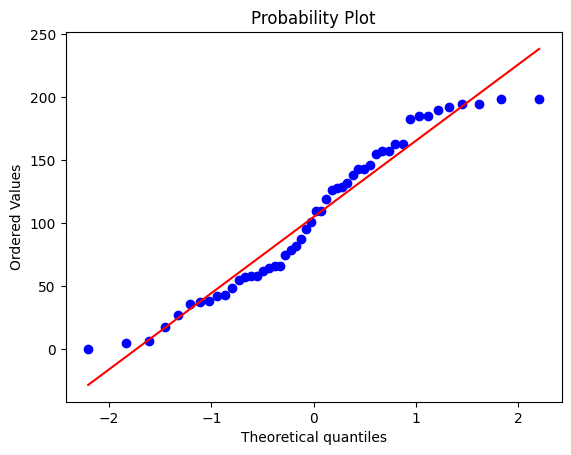

In [35]:
#qqplot 
import pylab
stats.probplot(num,dist="norm",plot=pylab);

* Shapiro test

In [ ]:
#if pvalue is less than %5 H0 is rejected
#if pvalue is bigger than %5 H0 is okay
from scipy.stats import shapiro
shapiro(num)

ShapiroResult(statistic=np.float64(0.9445747340376306), pvalue=np.float64(0.020517647931082992))

In [ ]:
#if pvalue is bigger than %5  
stats.ttest_1samp(num,popmean=50)

TtestResult(statistic=np.float64(6.437920305263192), pvalue=np.float64(4.928151572989705e-08), df=np.int64(49))

* a dd has been done and the  return value =0,125
h0 p==0,125
h1 p!=0,125

In [43]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# h0 is rejcted cause of pvalue 

count=40
n=500
value=0.125
proportions_ztest(count,n,value)

(np.float64(-3.7090151628513017), np.float64(0.0002080669689845979))

**A/B Testig**
* Normal
* Varyans Homojen

In [48]:
A= np.random.randint(1,100,50)
B= np.random.randint(1,100,50)
A=pd.DataFrame(A)
B=pd.DataFrame(B)

In [ ]:
A_B=pd.concat([A,B],axis=1)
A_B.columns=["A","B"]

In [53]:
A_B.head()

,A,B
0,34,55
1,88,68
2,79,44
3,97,45
4,57,50


56.666666666666664